<a href="https://colab.research.google.com/github/Xneutral/Android-Example/blob/mvvm-testing/ANN_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

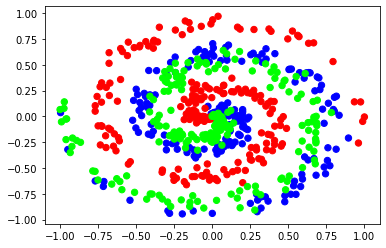

New set of weights found, iteration: 0 loss: 1.0986885 acc 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0986524 acc 0.3333333333333333
New set of weights found, iteration: 138 loss: 1.0986302 acc 0.3333333333333333
New set of weights found, iteration: 901 loss: 1.0986263 acc 0.3333333333333333
New set of weights found, iteration: 1000 loss: 1.0986261 acc 0.3333333333333333
New set of weights found, iteration: 1129 loss: 1.0986196 acc 0.3333333333333333
New set of weights found, iteration: 2809 loss: 1.0986148 acc 0.3333333333333333
New set of weights found, iteration: 17409 loss: 1.0986145 acc 0.3333333333333333
New set of weights found, iteration: 26426 loss: 1.0986129 acc 0.3333333333333333
New set of weights found, iteration: 116553 loss: 1.0986128 acc 0.3333333333333333


In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt


nnfs.init()

class Layer_Dense:

  def __init__(self,n_input,n_neurons):

    self.weights= 0.05*np.random.randn(n_input,n_neurons)
    self.bias= 0.05*np.random.randn(1,n_neurons)
  
  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.bias

class Activation_Relu:

  def forward(self,inputs):
    self.inputs=inputs
    self.output = np.maximum(0,inputs)


class Activation_Softmax:

  def forward(self,inputs):
    self.input=inputs
    exp_values=np.exp(inputs-np.max(inputs,axis=1, keepdims=True))
    probabilities= exp_values/np.sum(exp_values,axis=1, keepdims=True)
    self.output = probabilities

class Loss:
  # Calculates the data and regularization losses
  # given model output and ground truth values
  def calculate(self, output, y):
    # Calculate sample losses
    sample_losses = self.forward(output, y)
    # Calculate mean loss
    data_loss = np.mean(sample_losses)
    # Return loss
    return data_loss


class Loss_CategoricalCrossentropy(Loss):
  # Forward pass
  def forward(self, y_pred, y_true):
    # Number of samples in a batch
    samples = len(y_pred)
    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[
          range(samples),
          y_true
          ]
    # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(
          y_pred_clipped * y_true,
          axis=1
          )
    # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods


class_targets = np.array([1, 1, 1])

x,y = spiral_data(samples=200,classes=3)

dense1 = Layer_Dense(2,4)
dense2 = Layer_Dense(4,4)
dense3 = Layer_Dense(4,5)
dense4 = Layer_Dense(5,6)
dense5 = Layer_Dense(6,4)
dense6 = Layer_Dense(4,3)
dense7 = Layer_Dense(3,3)



relu1= Activation_Relu()
relu2= Activation_Relu()
relu3= Activation_Relu()
relu4= Activation_Relu()
relu5= Activation_Relu()
relu6= Activation_Relu()

activation = Activation_Softmax()


lowest_loss=9999


plt.scatter(x[:,0],x[:,1], c=y, s=40, cmap='brg')
plt.show()

for iteration in range(100000000000):
  # Generate a new set of weights for iteration
  
  dense1.weights = 0.05 * np.random.randn(2, 4)
  dense1.biases = 0.05 * np.random.randn(1, 4)

  dense2.weights = 0.05 * np.random.randn(4, 4)
  dense2.biases = 0.05 * np.random.randn(1, 4)

  dense3.weights = 0.05 * np.random.randn(4, 5)
  dense3.biases = 0.05 * np.random.randn(1, 5)

  dense4.weights = 0.05 * np.random.randn(5, 6)
  dense4.biases = 0.05 * np.random.randn(1, 6)

  dense5.weights = 0.05 * np.random.randn(6, 4)
  dense5.biases = 0.05 * np.random.randn(1, 4)

  dense6.weights = 0.05 * np.random.randn(4, 3)
  dense6.biases = 0.05 * np.random.randn(1, 3)

  dense7.weights = 0.05 * np.random.randn(3, 3)
  dense7.biases = 0.05 * np.random.randn(1, 3)

  dense1.forward(x)
  relu1.forward(dense1.output)

  dense2.forward(relu1.output)
  relu2.forward(dense2.output)

  dense3.forward(relu2.output)
  relu3.forward(dense3.output)

  dense4.forward(relu3.output)
  relu4.forward(dense4.output)

  dense5.forward(relu4.output)
  relu5.forward(dense5.output)

  dense6.forward(relu5.output)
  relu6.forward(dense6.output)

  dense7.forward(relu6.output)
  activation.forward(dense7.output)
  loss_function = Loss_CategoricalCrossentropy()
  loss = loss_function.calculate(activation.output,y)

  predictions = np.argmax(activation.output, axis=1)
  if len(y.shape) == 2:
    y = np.argmax(class_targets, axis=1)
  # True evaluates to 1; False to 0
  accuracy = np.mean(predictions==y)

  # print(loss)
  if loss < lowest_loss:
    print('New set of weights found, iteration:', iteration,
          'loss:', loss,'acc',accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()

    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()

    best_dense3_weights = dense3.weights.copy()
    best_dense3_biases = dense3.biases.copy()

    best_dense4_weights = dense4.weights.copy()
    best_dense4_biases = dense4.biases.copy()

    best_dense5_weights = dense5.weights.copy()
    best_dense5_biases = dense5.biases.copy()

    best_dense6_weights = dense6.weights.copy()
    best_dense6_biases = dense6.biases.copy()

    best_dense7_weights = dense7.weights.copy()
    best_dense7_biases = dense7.biases.copy()

    lowest_loss = loss
    
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()
    dense3.weights = best_dense3_weights.copy()
    dense3.biases = best_dense3_biases.copy()
    dense4.weights = best_dense4_weights.copy()
    dense4.biases = best_dense4_biases.copy()
    dense5.weights = best_dense5_weights.copy()
    dense5.biases = best_dense5_biases.copy()
    dense6.weights = best_dense6_weights.copy()
    dense6.biases = best_dense6_biases.copy()
    dense7.weights = best_dense7_weights.copy()
    dense7.biases = best_dense7_biases.copy()

  
  
    

In [2]:
pip install nnfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


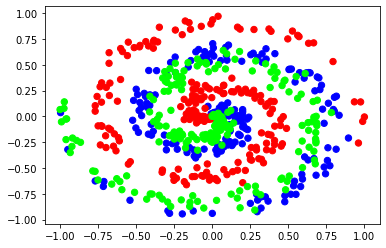

New set of weights found, iteration: 0 loss: 1.0986844 acc 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0986316 acc 0.3333333333333333
New set of weights found, iteration: 57 loss: 1.0986152 acc 0.3333333333333333
New set of weights found, iteration: 358 loss: 1.0986145 acc 0.3333333333333333
New set of weights found, iteration: 947 loss: 1.0986136 acc 0.3333333333333333


In [ ]:
# Linear AnD SOFTMAX


import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt


nnfs.init()

class Layer_Dense:

  def __init__(self,n_input,n_neurons):

    self.weights= 0.05*np.random.randn(n_input,n_neurons)
    self.bias= 0.05*np.random.randn(1,n_neurons)
  
  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.bias

class Activation_Softmax:

  def forward(self,inputs):
    self.input=inputs
    exp_values=np.exp(inputs-np.max(inputs,axis=1, keepdims=True))
    probabilities= exp_values/np.sum(exp_values,axis=1, keepdims=True)
    self.output = probabilities

class Loss:
  # Calculates the data and regularization losses
  # given model output and ground truth values
  def calculate(self, output, y):
    # Calculate sample losses
    sample_losses = self.forward(output, y)
    # Calculate mean loss
    data_loss = np.mean(sample_losses)
    # Return loss
    return data_loss


class Loss_CategoricalCrossentropy(Loss):
  # Forward pass
  def forward(self, y_pred, y_true):
    # Number of samples in a batch
    samples = len(y_pred)
    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[
          range(samples),
          y_true
          ]
    # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(
          y_pred_clipped * y_true,
          axis=1
          )
    # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods



class_targets = np.array([1, 0, 1])

x,y = spiral_data(samples=200,classes=3)

dense1 = Layer_Dense(2,4)
dense2 = Layer_Dense(4,4)
dense3 = Layer_Dense(4,5)
dense4 = Layer_Dense(5,6)
dense5 = Layer_Dense(6,4)
dense6 = Layer_Dense(4,3)
dense7 = Layer_Dense(3,3)




activation = Activation_Softmax()


lowest_loss=9999


plt.scatter(x[:,0],x[:,1], c=y, s=40, cmap='brg')
plt.show()

for iteration in range(1000):
  # Generate a new set of weights for iteration
  
  dense1.weights = 0.05 * np.random.randn(2, 4)
  dense1.biases = 0.05 * np.random.randn(1, 4)

  dense2.weights = 0.05 * np.random.randn(4, 4)
  dense2.biases = 0.05 * np.random.randn(1, 4)

  dense3.weights = 0.05 * np.random.randn(4, 5)
  dense3.biases = 0.05 * np.random.randn(1, 5)

  dense4.weights = 0.05 * np.random.randn(5, 6)
  dense4.biases = 0.05 * np.random.randn(1, 6)

  dense5.weights = 0.05 * np.random.randn(6, 4)
  dense5.biases = 0.05 * np.random.randn(1, 4)

  dense6.weights = 0.05 * np.random.randn(4, 3)
  dense6.biases = 0.05 * np.random.randn(1, 3)

  dense7.weights = 0.05 * np.random.randn(3, 3)
  dense7.biases = 0.05 * np.random.randn(1, 3)

  dense1.forward(x)
  dense2.forward(dense1.output)
  dense3.forward(dense2.output)
  dense4.forward(dense3.output)

  dense5.forward(dense4.output)

  dense6.forward(dense5.output)
  dense7.forward(dense6.output)
  activation.forward(dense7.output)
  loss_function = Loss_CategoricalCrossentropy()
  loss = loss_function.calculate(activation.output,y)

  predictions = np.argmax(activation.output, axis=1)
  if len(y.shape) == 2:
    y = np.argmax(class_targets, axis=1)
  # True evaluates to 1; False to 0
  accuracy = np.mean(predictions==y)

  # print(loss)
  if loss < lowest_loss:
    print('New set of weights found, iteration:', iteration,
          'loss:', loss,'acc',accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()

    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()

    best_dense3_weights = dense3.weights.copy()
    best_dense3_biases = dense3.biases.copy()

    best_dense4_weights = dense4.weights.copy()
    best_dense4_biases = dense4.biases.copy()

    best_dense5_weights = dense5.weights.copy()
    best_dense5_biases = dense5.biases.copy()

    best_dense6_weights = dense6.weights.copy()
    best_dense6_biases = dense6.biases.copy()

    best_dense7_weights = dense7.weights.copy()
    best_dense7_biases = dense7.biases.copy()

    lowest_loss = loss

  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()
    dense3.weights = best_dense3_weights.copy()
    dense3.biases = best_dense3_biases.copy()
    dense4.weights = best_dense4_weights.copy()
    dense4.biases = best_dense4_biases.copy()
    dense5.weights = best_dense5_weights.copy()
    dense5.biases = best_dense5_biases.copy()
    dense6.weights = best_dense6_weights.copy()
    dense6.biases = best_dense6_biases.copy()
    dense7.weights = best_dense7_weights.copy()
    dense7.biases = best_dense7_biases.copy()

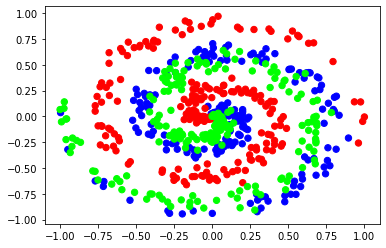

New set of weights found, iteration: 0 loss: 0.68358034 acc 0.3333333333333333
New set of weights found, iteration: 1 loss: 0.6795815 acc 0.3333333333333333
New set of weights found, iteration: 20 loss: 0.679052 acc 0.3333333333333333
New set of weights found, iteration: 128 loss: 0.67900693 acc 0.3333333333333333
New set of weights found, iteration: 196 loss: 0.67728335 acc 0.3333333333333333
New set of weights found, iteration: 227 loss: 0.676435 acc 0.3333333333333333


In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt


nnfs.init()

class Layer_Dense:

  def __init__(self,n_input,n_neurons):

    self.weights= 0.05*np.random.randn(n_input,n_neurons)
    self.bias= 0.05*np.random.randn(1,n_neurons)
  
  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.bias


class Loss:
  # Calculates the data and regularization losses
  # given model output and ground truth values
  def calculate(self, output, y):
    # Calculate sample losses
    sample_losses = self.forward(output, y)
    # Calculate mean loss
    data_loss = np.mean(sample_losses)
    # Return loss
    return data_loss


class Loss_CategoricalCrossentropy(Loss):
  # Forward pass
  def forward(self, y_pred, y_true):
    # Number of samples in a batch
    samples = len(y_pred)
    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[
          range(samples),
          y_true
          ]
    # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(
          y_pred_clipped * y_true,
          axis=1
          )
    # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

class Activation_Sigmoid:
  # Forward pass
  def forward(self, inputs):
    # Save input and calculate/save output
    # of the sigmoid function
    self.inputs = inputs
    self.output = 1 / (1 + np.exp(-inputs))





x,y = spiral_data(samples=200,classes=3)

dense1 = Layer_Dense(2,4)
dense2 = Layer_Dense(4,4)
dense3 = Layer_Dense(4,5)
dense4 = Layer_Dense(5,6)
dense5 = Layer_Dense(6,4)
dense6 = Layer_Dense(4,3)
dense7 = Layer_Dense(3,3)



relu1= Activation_Relu()
relu2= Activation_Relu()
relu3= Activation_Relu()
relu4= Activation_Relu()
relu5= Activation_Relu()
relu6= Activation_Relu()

activation = Activation_Sigmoid()


lowest_loss=99


plt.scatter(x[:,0],x[:,1], c=y, s=40, cmap='brg')
plt.show()

for iteration in range(1000):
  # Generate a new set of weights for iteration
  
  dense1.weights = 0.05 * np.random.randn(2, 4)
  dense1.biases = 0.05 * np.random.randn(1, 4)

  dense2.weights = 0.05 * np.random.randn(4, 4)
  dense2.biases = 0.05 * np.random.randn(1, 4)

  dense3.weights = 0.05 * np.random.randn(4, 5)
  dense3.biases = 0.05 * np.random.randn(1, 5)

  dense4.weights = 0.05 * np.random.randn(5, 6)
  dense4.biases = 0.05 * np.random.randn(1, 6)

  dense5.weights = 0.05 * np.random.randn(6, 4)
  dense5.biases = 0.05 * np.random.randn(1, 4)

  dense6.weights = 0.05 * np.random.randn(4, 3)
  dense6.biases = 0.05 * np.random.randn(1, 3)

  dense7.weights = 0.05 * np.random.randn(3, 3)
  dense7.biases = 0.05 * np.random.randn(1, 3)

  dense1.forward(x)
  relu1.forward(dense1.output)

  dense2.forward(relu1.output)
  relu2.forward(dense2.output)

  dense3.forward(relu2.output)
  relu3.forward(dense3.output)

  dense4.forward(relu3.output)
  relu4.forward(dense4.output)

  dense5.forward(relu4.output)
  relu5.forward(dense5.output)

  dense6.forward(relu5.output)
  relu6.forward(dense6.output)

  dense7.forward(relu6.output)
  activation.forward(dense7.output)
  loss_function = Loss_CategoricalCrossentropy()
  loss = loss_function.calculate(activation.output,y)

  predictions = np.argmax(activation.output, axis=1)
  if len(y.shape) == 2:
    y = np.argmax(class_targets, axis=1)
  # True evaluates to 1; False to 0
  accuracy = np.mean(predictions==y)

  # print(loss)
  if loss < lowest_loss:
    print('New set of weights found, iteration:', iteration,
          'loss:', loss,'acc',accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()

    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()

    best_dense3_weights = dense3.weights.copy()
    best_dense3_biases = dense3.biases.copy()

    best_dense4_weights = dense4.weights.copy()
    best_dense4_biases = dense4.biases.copy()

    best_dense5_weights = dense5.weights.copy()
    best_dense5_biases = dense5.biases.copy()

    best_dense6_weights = dense6.weights.copy()
    best_dense6_biases = dense6.biases.copy()

    best_dense7_weights = dense7.weights.copy()
    best_dense7_biases = dense7.biases.copy()

    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()
    dense3.weights = best_dense3_weights.copy()
    dense3.biases = best_dense3_biases.copy()
    dense4.weights = best_dense4_weights.copy()
    dense4.biases = best_dense4_biases.copy()
    dense5.weights = best_dense5_weights.copy()
    dense5.biases = best_dense5_biases.copy()
    dense6.weights = best_dense6_weights.copy()
    dense6.biases = best_dense6_biases.copy()
    dense7.weights = best_dense7_weights.copy()
    dense7.biases = best_dense7_biases.copy()


    